### 1. Collecting the data

In [1]:
import pandas as pd # type: ignore

df = pd.read_csv('ToyotaCorolla.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


### 2. Data Cleaning

In [3]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [4]:
df['Doors'].value_counts()

Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64

In [5]:
df['Gears'].value_counts()

Gears
5    1390
6      43
3       2
4       1
Name: count, dtype: int64

In [6]:
df['Automatic'].value_counts()

Automatic
0    1356
1      80
Name: count, dtype: int64

In [7]:
# As the Cylinders column contains only the value '4' in all the rows. The Cylinders column is of no use.
# So, we can remove the Cylinders column from the dataset.
df.drop(df[['Cylinders']], axis = 1, inplace = True)

In [8]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,6.000000,1615.00000


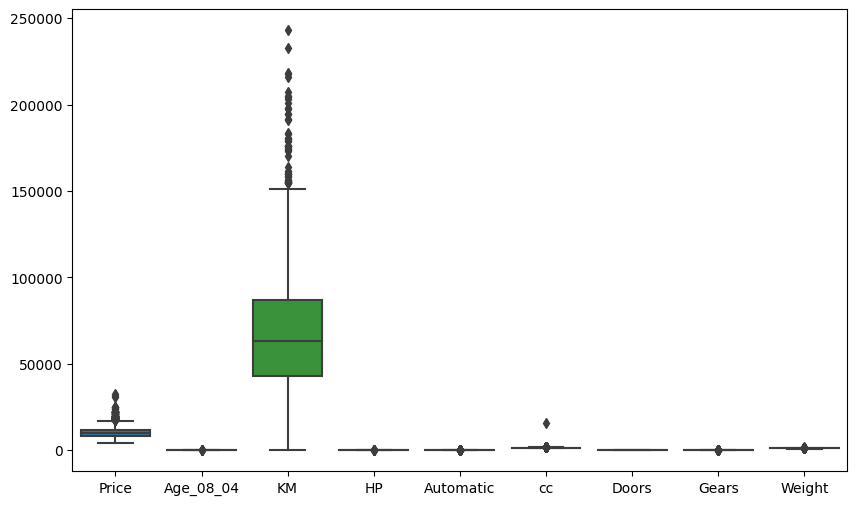

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.boxplot(data=df)
plt.show()

As the outliers are present in the columns of the given dataset, we have to impute the outliers rather than removing them.

Hence we can replace the outliers with median value of that respective column.

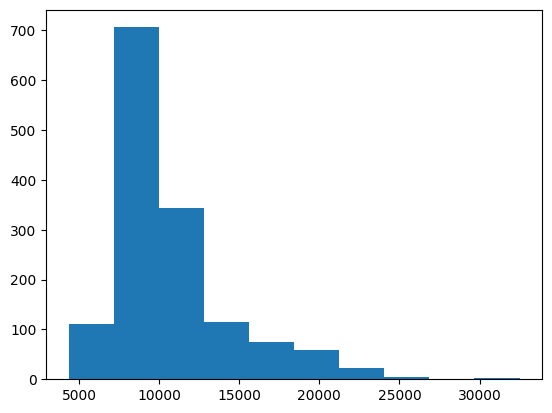

In [10]:
import matplotlib.pyplot as plt # type: ignore
plt.hist(df['Price'])
plt.show()

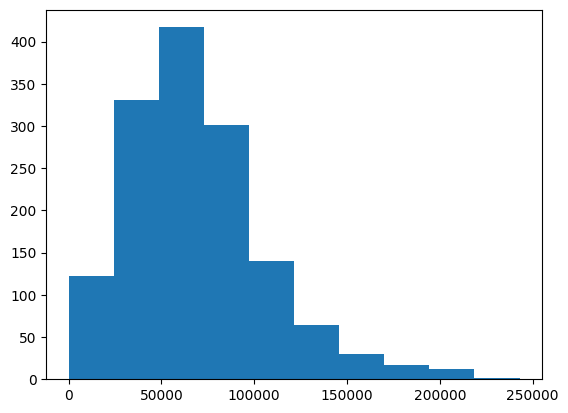

In [11]:
plt.hist(df['KM'])
plt.show()

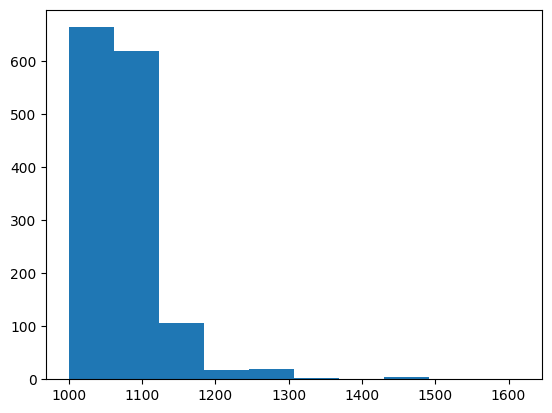

In [12]:
plt.hist(df['Weight'])
plt.show()

As the skewness of the above histograms is highely positive skewed, it indicates the presence of outliers.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [14]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


In [15]:
# Imputing the outliers with Median value

import numpy as np # type: ignore

df_num = df[['Age_08_04', 'KM', 'HP', 'cc', 'Weight']]

def replace_outliers_with_median(df):
  """
  Replaces outliers in each column of a DataFrame with the median of that column,
  excluding the outliers themselves.

  Args:
    df: A pandas DataFrame.

  Returns:
    A new pandas DataFrame with outliers replaced by median values.
  """
  new_df = df.copy()

  # Iterate over numeric columns
  for col in new_df.select_dtypes(include=[np.number]):
    # Define IQR outlier threshold function (adjust multiplier as needed)
    def is_outlier(series):
      q1 = series.quantile(0.25)
      q3 = series.quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - (1.5 * iqr)
      upper_bound = q3 + (1.5 * iqr)
      return ~((series >= lower_bound) & (series <= upper_bound))

    # Find outliers (boolean Series)
    outliers = is_outlier(new_df[col])
    
    # Replace outliers with median (excluding outliers in median calculation)
    median_val = new_df.loc[~outliers, col].median()
    new_df.loc[outliers, col] = median_val

  return new_df

X = replace_outliers_with_median(df_num)
print(X)

      Age_08_04     KM   HP    cc  Weight
0            23  46986   90  1600    1065
1            23  72937   90  1600    1065
2            24  41711   90  1600    1065
3            26  48000   90  1600    1065
4            30  38500   90  1600    1065
...         ...    ...  ...   ...     ...
1431         69  20544   86  1300    1025
1432         72  19000   86  1300    1015
1433         71  17016   86  1300    1015
1434         70  16916   86  1300    1015
1435         76      1  110  1600    1114

[1436 rows x 5 columns]


The outliers present in the continuous variables has been replaced with the median value of that respective column 

in which the median is calculated without the presence of outliers in the column.

In [16]:
df.drop(df[['Fuel_Type']], axis =1).corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000


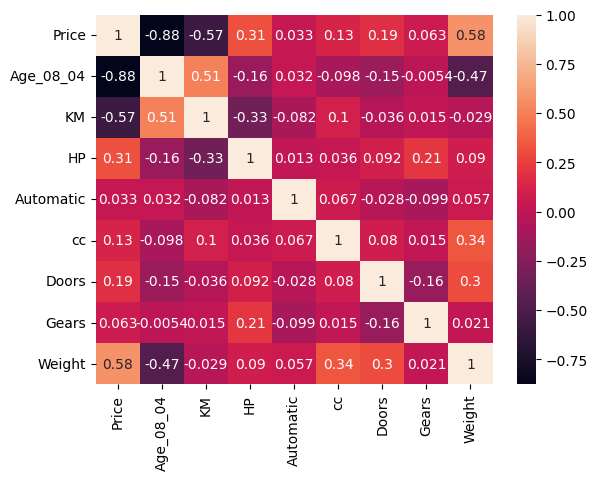

In [17]:
import seaborn as sns
df1 = df.drop(df[['Fuel_Type']], axis = 1)
sns.heatmap(df1.corr(), annot = True)
plt.show()

In [18]:
df_cat = df[['Fuel_Type', 'Automatic', 'Doors', 'Gears']]
df_cat.head()

,Fuel_Type,Automatic,Doors,Gears
0,Diesel,0,3,5
1,Diesel,0,3,5
2,Diesel,0,3,5
3,Diesel,0,3,5
4,Diesel,0,3,5


### 3. Data Transformation

In [19]:
# Standardization

from sklearn.preprocessing import MinMaxScaler # type: ignore
mm = MinMaxScaler()

df_num = mm.fit_transform(X)
df_num = pd.DataFrame(df_num)
df_num.columns = list(X)
df_num.head()

,Age_08_04,KM,HP,cc,Weight
0,0.229730,0.310544,0.446809,0.5,0.433333
1,0.229730,0.482065,0.446809,0.5,0.433333
2,0.243243,0.275679,0.446809,0.5,0.433333
3,0.270270,0.317246,0.446809,0.5,0.433333
4,0.324324,0.254456,0.446809,0.5,0.433333


In [20]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder # type: ignore
LE = LabelEncoder()

df_cat['Fuel_Type'] = LE.fit_transform(df_cat[['Fuel_Type']])
df_cat['Automatic'] = LE.fit_transform(df_cat[['Automatic']])
df_cat['Doors'] = LE.fit_transform(df_cat[['Doors']])
df_cat['Gears'] = LE.fit_transform(df_cat[['Gears']])
df_cat.head()

C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cs833\AppData\Local\Temp\ipykernel_5708\4068625067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Fuel_Type'] = LE.fit_transform(df_cat[['Fuel_Type']])
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Use

,Fuel_Type,Automatic,Doors,Gears
0,1,0,1,2
1,1,0,1,2
2,1,0,1,2
3,1,0,1,2
4,1,0,1,2


In [21]:
X = pd.concat([df_num, df_cat], axis = 1)
X.head()

,Age_08_04,KM,HP,cc,Weight,Fuel_Type,Automatic,Doors,Gears
0,0.229730,0.310544,0.446809,0.5,0.433333,1,0,1,2
1,0.229730,0.482065,0.446809,0.5,0.433333,1,0,1,2
2,0.243243,0.275679,0.446809,0.5,0.433333,1,0,1,2
3,0.270270,0.317246,0.446809,0.5,0.433333,1,0,1,2
4,0.324324,0.254456,0.446809,0.5,0.433333,1,0,1,2


In [22]:
Y = df[['Price']]
Y.shape

(1436, 1)

### 4. Data Partition

In [23]:
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

### 5. Model Fitting

In [24]:
from sklearn.linear_model import LinearRegression # type: ignore
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)
LR_coef = model.coef_.ravel()
LR_coef

array([-9961.63879682, -3460.54059803,  2421.98603668, -1204.01866725,
        1771.90351409,  -742.08056927,   675.52249551,   115.71275983,
        1312.990019  ])

In [25]:
# metrics

from sklearn.metrics import mean_squared_error, r2_score # type: ignore

print('Training error:', mean_squared_error(Y_train, Y_pred_train, squared=False).round(3))
print('Testing error:', mean_squared_error(Y_test, Y_pred_test, squared=False).round(3))
print('Training R squared value:', r2_score(Y_train, Y_pred_train).round(3))
print('Testing R squared value:', r2_score(Y_test, Y_pred_test).round(3))

Training error: 1783.469
Testing error: 1864.721
Training R squared value: 0.754
Testing R squared value: 0.753


By considering all X variables, we obtain the training and testing R-square values as 75.4% and 75.3%.

### 6. Data Validation

In [26]:
# Cross validation

training_err = []
test_err = []

for i in range(1, 200):
    from sklearn.model_selection import train_test_split # type: ignore
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=i)
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_err.append(mean_squared_error(Y_train, Y_pred_train, squared=False))
    test_err.append(mean_squared_error(Y_test, Y_pred_test, squared=False))

import numpy as np # type: ignore
print('Cross Validation - Training error', np.mean(training_err).round(3))
print('Cross Validation - Testing error', np.mean(test_err).round(3))


Cross Validation - Training error 1789.34
Cross Validation - Testing error 1826.408


1. The average training error of the model is 1789.34.
2. The average testing error of the model is 1826.408.

#### Ridge Regression

In [27]:
# Ridge Regression

LR_coef

from sklearn.linear_model import Ridge # type: ignore
model = Ridge(alpha = 35000)

model.fit(X_train, Y_train)


Ridge_coeff = model.coef_.ravel()

coeff = pd.concat([pd.DataFrame(list(X)), pd.DataFrame(LR_coef), pd.DataFrame(Ridge_coeff)], axis = 1)
coeff

,0,0,0
0,Age_08_04,-9961.638797,-24.763460
1,KM,-3460.540598,-14.294862
2,HP,2421.986037,7.581887
3,cc,-1204.018667,4.329908
4,Weight,1771.903514,9.303740
5,Fuel_Type,-742.080569,-0.876023
6,Automatic,675.522496,0.774829
7,Doors,115.712760,24.086722
8,Gears,1312.990019,1.526355


In [28]:
X_new = X.drop(X.columns[[5, 6]], axis = 1)
X_new

# Cross Validation
training_err = []
test_err = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y, test_size=0.25,random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    Y_pred_train = lr.predict(X_train)
    Y_pred_test  = lr.predict(X_test)
    training_err.append(mean_squared_error(Y_train,Y_pred_train,squared=False))
    test_err.append(mean_squared_error(Y_test,Y_pred_test,squared=False))

import numpy as np # type: ignore
print("Cross validation - Training error:" ,np.mean(training_err).round(2))
print("Cross validation - Test error:" ,np.mean(test_err).round(2))

Cross validation - Training error: 1815.17
Cross validation - Test error: 1815.77


In [29]:
X.head()

,Age_08_04,KM,HP,cc,Weight,Fuel_Type,Automatic,Doors,Gears
0,0.229730,0.310544,0.446809,0.5,0.433333,1,0,1,2
1,0.229730,0.482065,0.446809,0.5,0.433333,1,0,1,2
2,0.243243,0.275679,0.446809,0.5,0.433333,1,0,1,2
3,0.270270,0.317246,0.446809,0.5,0.433333,1,0,1,2
4,0.324324,0.254456,0.446809,0.5,0.433333,1,0,1,2


In [30]:
X1_new = X.drop(X.columns[[5]], axis = 1)
X1_new.head() # model-2

,Age_08_04,KM,HP,cc,Weight,Automatic,Doors,Gears
0,0.229730,0.310544,0.446809,0.5,0.433333,0,1,2
1,0.229730,0.482065,0.446809,0.5,0.433333,0,1,2
2,0.243243,0.275679,0.446809,0.5,0.433333,0,1,2
3,0.270270,0.317246,0.446809,0.5,0.433333,0,1,2
4,0.324324,0.254456,0.446809,0.5,0.433333,0,1,2


In [31]:
X2_new = X.drop(X.columns[[5, 6]], axis = 1)
X2_new.head() # model-3

,Age_08_04,KM,HP,cc,Weight,Doors,Gears
0,0.229730,0.310544,0.446809,0.5,0.433333,1,2
1,0.229730,0.482065,0.446809,0.5,0.433333,1,2
2,0.243243,0.275679,0.446809,0.5,0.433333,1,2
3,0.270270,0.317246,0.446809,0.5,0.433333,1,2
4,0.324324,0.254456,0.446809,0.5,0.433333,1,2


#### Ridge model - 1 

In [32]:
# Finalized model

from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=10)

# Fit the model
from sklearn.linear_model import LinearRegression # type: ignore
LR = LinearRegression()
LR.fit(X_train, Y_train)

Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)

In [33]:
# Metrics
from sklearn.metrics import mean_squared_error, r2_score # type: ignore

print('Training error:', mean_squared_error(Y_train, Y_pred_train, squared=False).round(3))
print('Testing error:', mean_squared_error(Y_test, Y_pred_test, squared=False).round(3))
print('Training R squared value:', r2_score(Y_train, Y_pred_train).round(3))
print('Testing R squared value:', r2_score(Y_test, Y_pred_test).round(3))

Training error: 1744.466
Testing error: 2015.101
Training R squared value: 0.761
Testing R squared value: 0.723


#### Ridge model - 2

In [34]:
# Finalized model

from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, Y_train, Y_test = train_test_split(X1_new, Y, test_size = 0.2, random_state=10)

# Fit the model
from sklearn.linear_model import LinearRegression # type: ignore
LR = LinearRegression()
LR.fit(X_train, Y_train)

Y_pred_train1 = LR.predict(X_train)
Y_pred_test1 = LR.predict(X_test)

In [35]:
# Metrics
from sklearn.metrics import mean_squared_error, r2_score # type: ignore

print('Training error:', mean_squared_error(Y_train, Y_pred_train1, squared=False).round(3))
print('Testing error:', mean_squared_error(Y_test, Y_pred_test1, squared=False).round(3))
print('Training R squared value:', r2_score(Y_train, Y_pred_train1).round(3))
print('Testing R squared value:', r2_score(Y_test, Y_pred_test1).round(3))

Training error: 1749.96
Testing error: 2051.771
Training R squared value: 0.76
Testing R squared value: 0.713


#### Ridge model - 3

In [36]:
# Finalized model

from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, Y_train, Y_test = train_test_split(X2_new, Y, test_size = 0.2, random_state=10)

# Fit the model
from sklearn.linear_model import LinearRegression # type: ignore
LR = LinearRegression()
LR.fit(X_train, Y_train)

Y_pred_train1 = LR.predict(X_train)
Y_pred_test1 = LR.predict(X_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score # type: ignore

print('Training error:', mean_squared_error(Y_train, Y_pred_train1, squared=False).round(3))
print('Testing error:', mean_squared_error(Y_test, Y_pred_test1, squared=False).round(3))
print('Training R squared value:', r2_score(Y_train, Y_pred_train1).round(3))
print('Testing R squared value:', r2_score(Y_test, Y_pred_test1).round(3))

Training error: 1755.471
Testing error: 2055.267
Training R squared value: 0.758
Testing R squared value: 0.712


#### Lasso Regression

In [37]:
X = pd.concat([df_num, df_cat], axis = 1)
X.head()

,Age_08_04,KM,HP,cc,Weight,Fuel_Type,Automatic,Doors,Gears
0,0.229730,0.310544,0.446809,0.5,0.433333,1,0,1,2
1,0.229730,0.482065,0.446809,0.5,0.433333,1,0,1,2
2,0.243243,0.275679,0.446809,0.5,0.433333,1,0,1,2
3,0.270270,0.317246,0.446809,0.5,0.433333,1,0,1,2
4,0.324324,0.254456,0.446809,0.5,0.433333,1,0,1,2


In [38]:
Y = df[['Price']]
Y.shape

(1436, 1)

In [39]:
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [40]:
from sklearn.linear_model import LinearRegression # type: ignore
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)
LR_coef = model.coef_.ravel()
LR_coef

array([-9961.63879682, -3460.54059803,  2421.98603668, -1204.01866725,
        1771.90351409,  -742.08056927,   675.52249551,   115.71275983,
        1312.990019  ])

In [41]:
LR_coef = LR_coef.ravel()

from sklearn.linear_model import Lasso # type: ignore
# reg = Lasso(alpha = 15) # 'cc' column is dropped
# reg = Lasso(alpha = 40) # 3 columns is dropped
reg = Lasso(alpha = 30) # 2 columns is dropped

reg.fit(X_train, Y_train)

coeff = pd.concat([pd.DataFrame(list(X)), pd.DataFrame(LR_coef), pd.DataFrame(reg.coef_)], axis = 1)
coeff

,0,0,0
0,Age_08_04,-9961.638797,-10016.439422
1,KM,-3460.540598,-2784.127994
2,HP,2421.986037,1298.330972
3,cc,-1204.018667,0.000000
4,Weight,1771.903514,1016.331159
5,Fuel_Type,-742.080569,-0.000000
6,Automatic,675.522496,63.246386
7,Doors,115.712760,124.982019
8,Gears,1312.990019,324.888422


In [42]:
X_new = X.drop(X.columns[[3, 5]], axis = 1)
X_new

# Cross Validation
training_err = []
test_err = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y, test_size=0.25,random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    Y_pred_train = lr.predict(X_train)
    Y_pred_test  = lr.predict(X_test)
    training_err.append(mean_squared_error(Y_train,Y_pred_train,squared=False))
    test_err.append(mean_squared_error(Y_test,Y_pred_test,squared=False))

import numpy as np # type: ignore
print("Cross validation - Training error:" ,np.mean(training_err).round(2))
print("Cross validation - Test error:" ,np.mean(test_err).round(2))

Cross validation - Training error: 1812.77
Cross validation - Test error: 1810.21


By removing 2-X variables, the varaince between Training error and testing error is reduced.

As we remove the X variables, the overfitting stage of the model is overcome and the training error is increased and testing error is decreased.


In [43]:
X.head() # model-1

,Age_08_04,KM,HP,cc,Weight,Fuel_Type,Automatic,Doors,Gears
0,0.229730,0.310544,0.446809,0.5,0.433333,1,0,1,2
1,0.229730,0.482065,0.446809,0.5,0.433333,1,0,1,2
2,0.243243,0.275679,0.446809,0.5,0.433333,1,0,1,2
3,0.270270,0.317246,0.446809,0.5,0.433333,1,0,1,2
4,0.324324,0.254456,0.446809,0.5,0.433333,1,0,1,2


In [44]:
X1 = X.drop(X[['cc']], axis = 1)
X1.head() # model-2

,Age_08_04,KM,HP,Weight,Fuel_Type,Automatic,Doors,Gears
0,0.229730,0.310544,0.446809,0.433333,1,0,1,2
1,0.229730,0.482065,0.446809,0.433333,1,0,1,2
2,0.243243,0.275679,0.446809,0.433333,1,0,1,2
3,0.270270,0.317246,0.446809,0.433333,1,0,1,2
4,0.324324,0.254456,0.446809,0.433333,1,0,1,2


In [45]:
X2 = X.drop(X[['cc', 'Fuel_Type']], axis = 1)
X2.head() # model-3

,Age_08_04,KM,HP,Weight,Automatic,Doors,Gears
0,0.229730,0.310544,0.446809,0.433333,0,1,2
1,0.229730,0.482065,0.446809,0.433333,0,1,2
2,0.243243,0.275679,0.446809,0.433333,0,1,2
3,0.270270,0.317246,0.446809,0.433333,0,1,2
4,0.324324,0.254456,0.446809,0.433333,0,1,2


#### Model - 1

In [46]:
# Finalized model

from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=10)

# Fit the model
from sklearn.linear_model import LinearRegression # type: ignore
LR = LinearRegression()
LR.fit(X_train, Y_train)

Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score # type: ignore

print('Training error:', mean_squared_error(Y_train, Y_pred_train, squared=False).round(3))
print('Testing error:', mean_squared_error(Y_test, Y_pred_test, squared=False).round(3))
print('Training R squared value:', r2_score(Y_train, Y_pred_train).round(3))
print('Testing R squared value:', r2_score(Y_test, Y_pred_test).round(3))

Training error: 1744.466
Testing error: 2015.101
Training R squared value: 0.761
Testing R squared value: 0.723


#### Model - 2

In [47]:
# Finalized model

from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.2, random_state=10)

# Fit the model
from sklearn.linear_model import LinearRegression # type: ignore
LR = LinearRegression()
LR.fit(X_train, Y_train)

Y1_pred_train = LR.predict(X_train)
Y1_pred_test = LR.predict(X_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score # type: ignore

print('Training error:', mean_squared_error(Y_train, Y1_pred_train, squared=False).round(3))
print('Testing error:', mean_squared_error(Y_test, Y1_pred_test, squared=False).round(3))
print('Training R squared value:', r2_score(Y_train, Y1_pred_train).round(3))
print('Testing R squared value:', r2_score(Y_test, Y1_pred_test).round(3))

Training error: 1750.369
Testing error: 2028.399
Training R squared value: 0.76
Testing R squared value: 0.72


#### Model - 3

In [48]:
# Finalized model

from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.2, random_state=10)

# Fit the model
from sklearn.linear_model import LinearRegression # type: ignore
LR = LinearRegression()
LR.fit(X_train, Y_train)

Y2_pred_train = LR.predict(X_train)
Y2_pred_test = LR.predict(X_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score # type: ignore

print('Training error:', mean_squared_error(Y_train, Y2_pred_train, squared=False).round(3))
print('Testing error:', mean_squared_error(Y_test, Y2_pred_test, squared=False).round(3))
print('Training R squared value:', r2_score(Y_train, Y2_pred_train).round(3))
print('Testing R squared value:', r2_score(Y_test, Y2_pred_test).round(3))

Training error: 1752.911
Testing error: 2050.692
Training R squared value: 0.759
Testing R squared value: 0.713


### 7. Final Model

In [49]:
# OLS method

from statsmodels.formula.api import ols # type: ignore
model = ols('Y~X2', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     609.9
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:01:16   Log-Likelihood:                -12813.
No. Observations:                1436   AIC:                         2.564e+04
Df Residuals:                    1428   BIC:                         2.568e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.436e+04    589.670     24.360      0.000    1.32e+04    1.55e+04
X2[0]      -1.021e+04    251.414    -40.621      0.000   -1.07e+04   -9719.473
X2[1]      -3188.5993    289.080    -11.030      0.000   -3755.667   -2621.532
X2[2]       1395.3630    184.735      7.553      0.000    1032.982    1757.744
X2[3]       1481.8607    263.671      5.620      0.000     964.637    1999.085
X2[4]        640.5382    213.228      3.004      0.003     222.265    1058.811
X2[5]        170.3849     57.626      2.957      0.003      57.344     283.425
X2[6]       1328.5561    262.357      5.064      0.000     813.909    1843.203
==============================================================================
Omnibus:                     1126.325   Durbin-Watson:                   1.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56461.376
Skew:                           3.196   Prob(JB):                         0.00
Kurtosis:                      33.046   Cond. No.                         44.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
r2 = model.rsquared
VIF = 1 / (1 - r2)
print('VIF value:', VIF)
# Here VIF value is 3.98.
# Hence, the model is excellent.

VIF value: 3.989467864180164


In [51]:
from statsmodels.formula.api import ols # type: ignore
model = ols('Y ~ X2', data = X2).fit()
model.summary()
r2 = model.rsquared
VIF = 1 / (1 - r2)
print('VIF value:', VIF)

VIF value: 3.989467864180164


In [52]:
# As VIF value = 3.977 < 5, model is excellent. We can consider the model.

# For the Assumptions purpose we have to perform Residual analysis
model.resid # Errors for every value

0      -1620.812594
1       -823.899914
2      -1143.973442
3        264.583774
4       -583.591693
           ...     
1431   -1315.749529
1432    2509.528162
1433     -15.293116
1434   -1405.409432
1435   -3265.160785
Length: 1436, dtype: float64

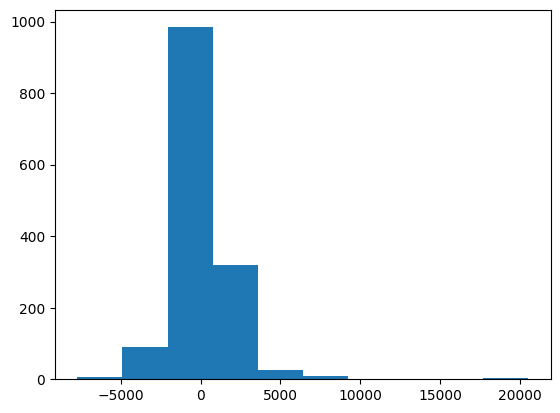

3.1994310502814214

In [53]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns
plt.hist(model.resid)
plt.show()
model.resid.skew()

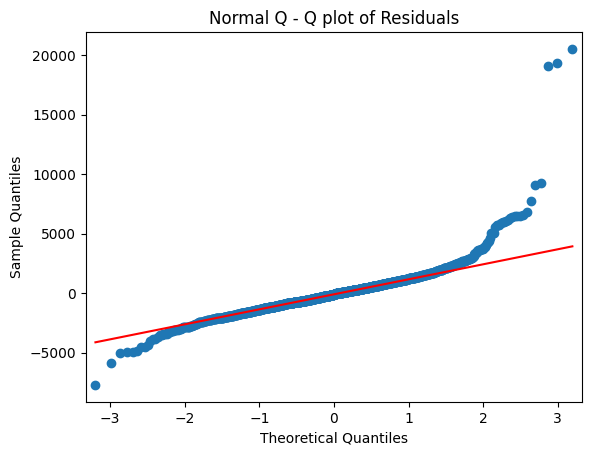

In [54]:
# Q - Q plot which is to identify the outliers among the X - values.
import statsmodels.api as sm # type: ignore
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q - Q plot of Residuals')
plt.show()

In [55]:
# Model Deletion Diagnostics
# Detecting Influencers / Outliers
# Cook's distance

(cooks, pvalue) = model.get_influence().cooks_distance
cooks = pd.DataFrame(cooks)

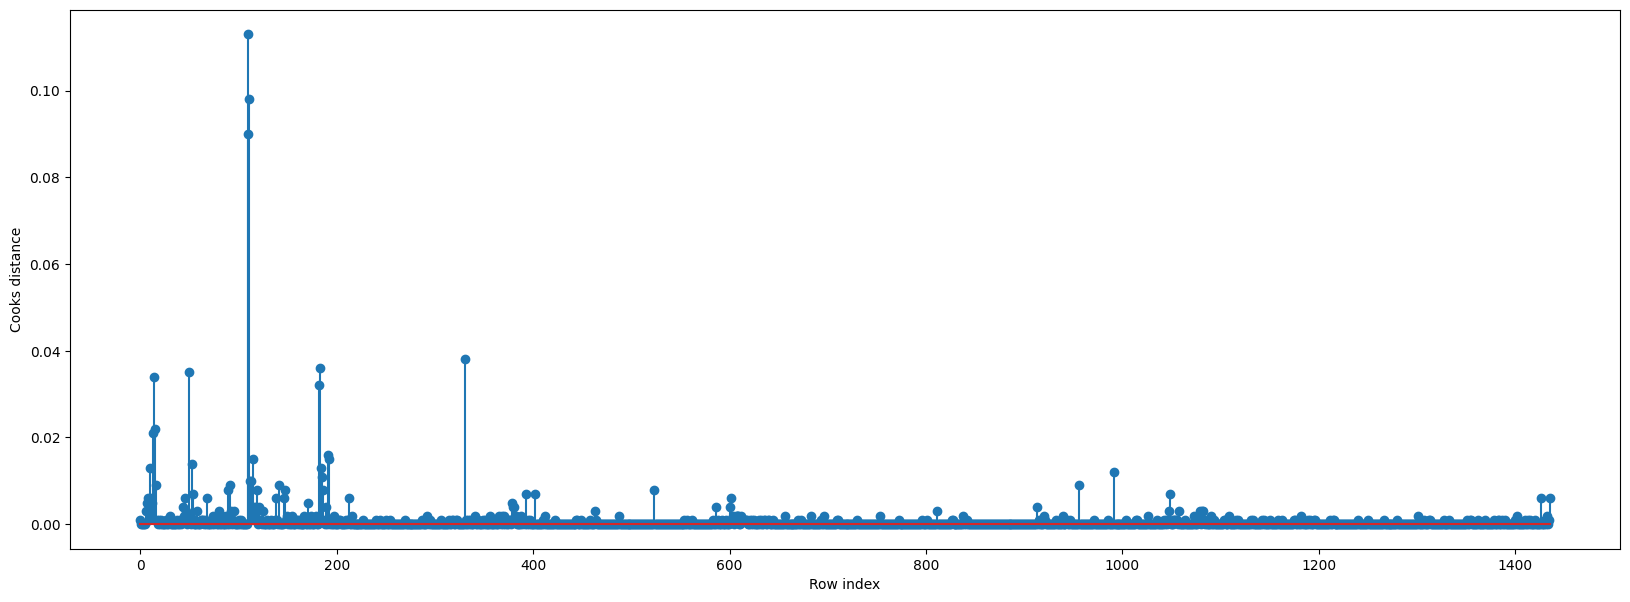

In [56]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
fig = plt.subplots(figsize = (20, 7))
plt.stem(np.arange(len(X2)), np.round(cooks[0], 3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()
# This plot shows the Cook's distance between each and every data points.

In [57]:
# Leverage Cutoff value is a value of cook's distance. 
# The data points having cook's distance more than Leverage Cutoff value will treated as Outliers / Influencers

k = X2.shape[1]
n = X2.shape[0]

leverage_cutoff = 3*((k + 1) / n)
leverage_cutoff

0.016713091922005572

In [58]:
# This gives the data points which are having cook's distance more than leverage Cutoff
cooks[0][cooks[0] > leverage_cutoff]

13     0.021487
14     0.033894
15     0.021902
49     0.034864
109    0.113367
110    0.090479
111    0.097516
182    0.031505
183    0.036370
330    0.038404
Name: 0, dtype: float64

In [59]:
Y = df[['Price']]
Y.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


In [60]:
Y.shape

(1436, 1)

In [61]:
df1 = pd.concat([X2, Y], axis = 1)
df1.head()

,Age_08_04,KM,HP,Weight,Automatic,Doors,Gears,Price
0,0.229730,0.310544,0.446809,0.433333,0,1,2,13500
1,0.229730,0.482065,0.446809,0.433333,0,1,2,13750
2,0.243243,0.275679,0.446809,0.433333,0,1,2,13950
3,0.270270,0.317246,0.446809,0.433333,0,1,2,14950
4,0.324324,0.254456,0.446809,0.433333,0,1,2,13750


In [62]:
# Now dropping the outliers
df1.drop([13, 14, 15, 49, 109, 110, 111, 182, 183, 330], inplace = True)
df1.shape

(1426, 8)

In [63]:
df1.head()

,Age_08_04,KM,HP,Weight,Automatic,Doors,Gears,Price
0,0.229730,0.310544,0.446809,0.433333,0,1,2,13500
1,0.229730,0.482065,0.446809,0.433333,0,1,2,13750
2,0.243243,0.275679,0.446809,0.433333,0,1,2,13950
3,0.270270,0.317246,0.446809,0.433333,0,1,2,14950
4,0.324324,0.254456,0.446809,0.433333,0,1,2,13750


In [64]:
# Now checking the model r_square after removing the outliers

X_final = df1.iloc[:, :-1]
Y = df1[['Price']]

model = ols('Y ~ X_final', data = df1).fit()
model.rsquared.round(4)

0.8099

In [65]:
print(X_final.shape)
print(Y.shape)

(1426, 7)
(1426, 1)


#### After removing all the outliers, calculating the metrics for the finalized model

In [66]:
# Finalized model

from sklearn.model_selection import train_test_split # type: ignore
X_train_final, X_test_final, Y_train_final, Y_test_final = train_test_split(X_final, Y, test_size = 0.2, random_state=10)

# Fit the model
from sklearn.linear_model import LinearRegression # type: ignore
LR = LinearRegression()
LR.fit(X_train_final, Y_train_final)

Y2_pred_train_final = LR.predict(X_train_final)
Y2_pred_test_final = LR.predict(X_test_final)

In [67]:
print('Training R square value:', r2_score(Y_train_final, Y2_pred_train_final).round(3))
print('Testing R square value:', r2_score(Y_test_final, Y2_pred_test_final).round(3))

Training R square value: 0.815
Testing R square value: 0.787


Training R square value is increasd by approximatley 6% and Testing R square value is increased by 3%.

The Training R-square value of the finalized model is 81.5%.

The testing R-square value of the finalized model is 78.7% which is performing well.